In [1]:
import numpy as np
import matplotlib.pyplot as plt
from draine_dust_2D import draine_dust
import astropy.units as u

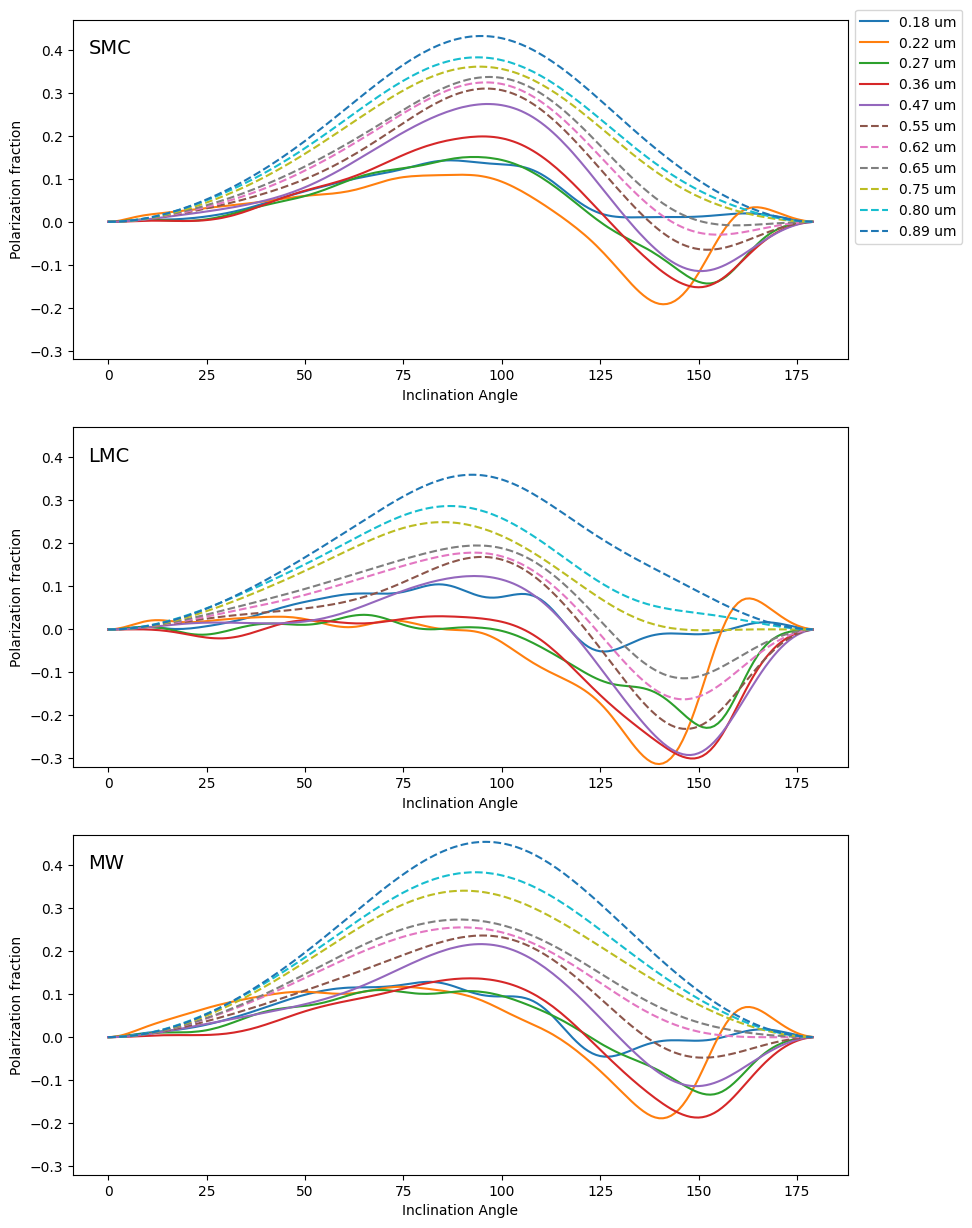

In [2]:
#This plot is meant to match Figure 5 of Draine et al. (2023)
lambdas = np.array([1820., 2220., 2696., 3550., 4685., 5470., 6165., 6492., 7480., 8020., 8930.]) * u.AA
thetas = np.arange(0., 180., 1.)*u.deg

fig, axs = plt.subplots(3,1, figsize=(10,15))
dust_types = ["SMC","LMC","MW"]

for i,ax in enumerate(axs):

    dust = draine_dust(type=dust_types[i])

    for k, lam in enumerate(lambdas):
        if k+1>0.5*len(lambdas):
            linestyle = 'dashed'
        else:
            linestyle = 'solid'
        ax.plot(thetas, dust.pfrac(lam.to(u.um).value, thetas.to(u.deg).value).flatten(), label="{:.2f} um".format(lam.to(u.um).value), linestyle=linestyle)
    if i==0:
        ax.legend(bbox_to_anchor=(1.0, 1.05))
    ax.set_ylabel("Polarization fraction")
    ax.set_xlabel("Inclination Angle")
    ax.set_ylim([-0.32, 0.47])
    ax.text(0.02, 0.9, dust_types[i], fontsize=14, transform=ax.transAxes)
plt.show()

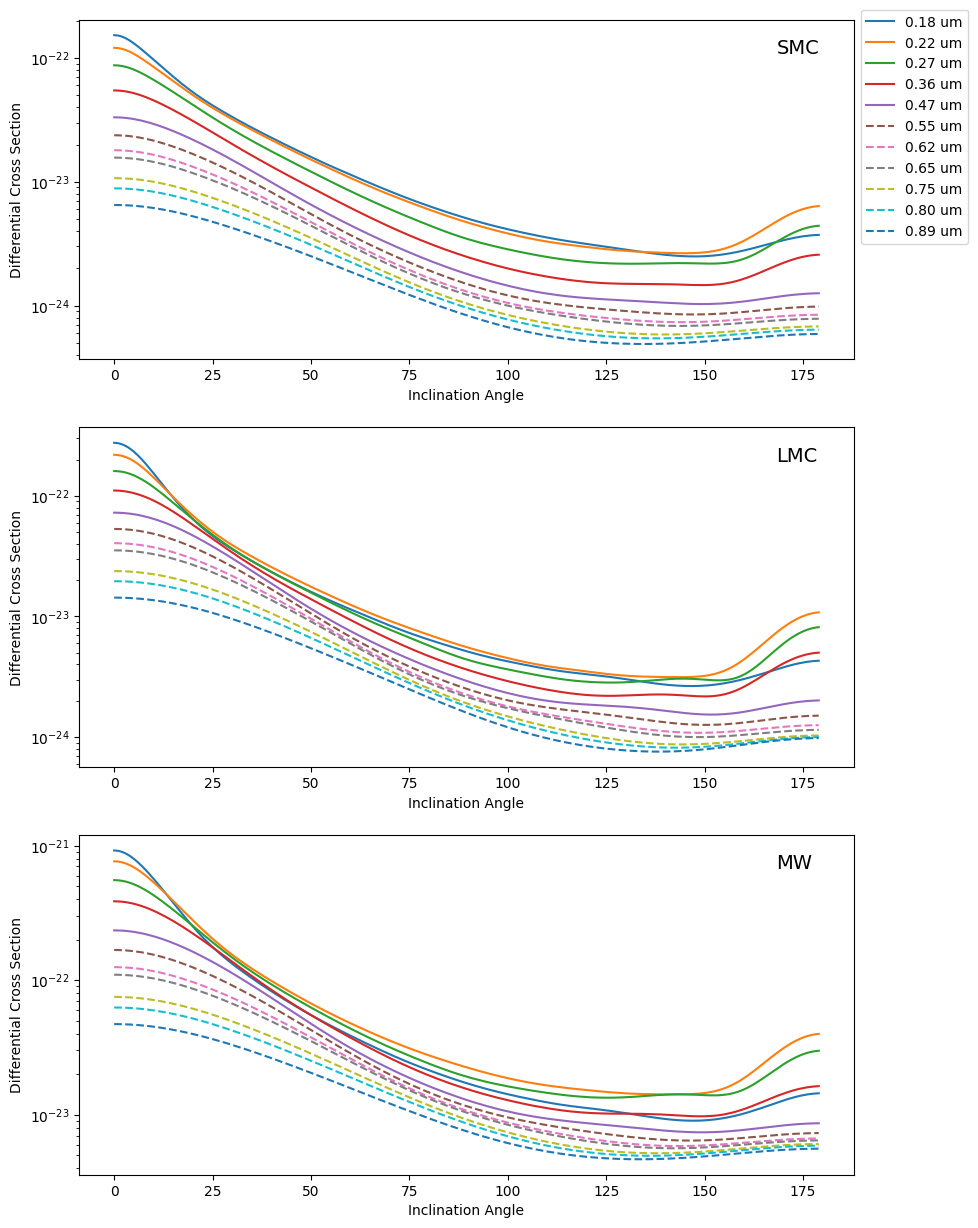

In [3]:
#This plot is meant to match Figure 3 of Draine et al. (2023)
lambdas = np.array([1820., 2220., 2696., 3550., 4685., 5470., 6165., 6492., 7480., 8020., 8930.]) * u.AA
thetas = np.arange(0., 180., 1.)*u.deg

fig, axs = plt.subplots(3,1, figsize=(10,15))
dust_types = ["SMC","LMC","MW"]

for i,ax in enumerate(axs):

    dust = draine_dust(type=dust_types[i])

    for k, lam in enumerate(lambdas):
        if k+1>0.5*len(lambdas):
            linestyle = 'dashed'
        else:
            linestyle = 'solid'
        ax.plot(thetas, dust.diff_cross_section(lam.to(u.um).value, thetas.to(u.deg).value).flatten(), label="{:.2f} um".format(lam.to(u.um).value), linestyle=linestyle)
    if i==0:
        ax.legend(bbox_to_anchor=(1.0, 1.05))
    ax.set_ylabel("Differential Cross Section")
    ax.set_xlabel("Inclination Angle")
    #ax.set_ylim([-0.32, 0.47])
    ax.set_yscale('log')
    ax.text(0.9, 0.9, dust_types[i], fontsize=14, transform=ax.transAxes)
plt.show()

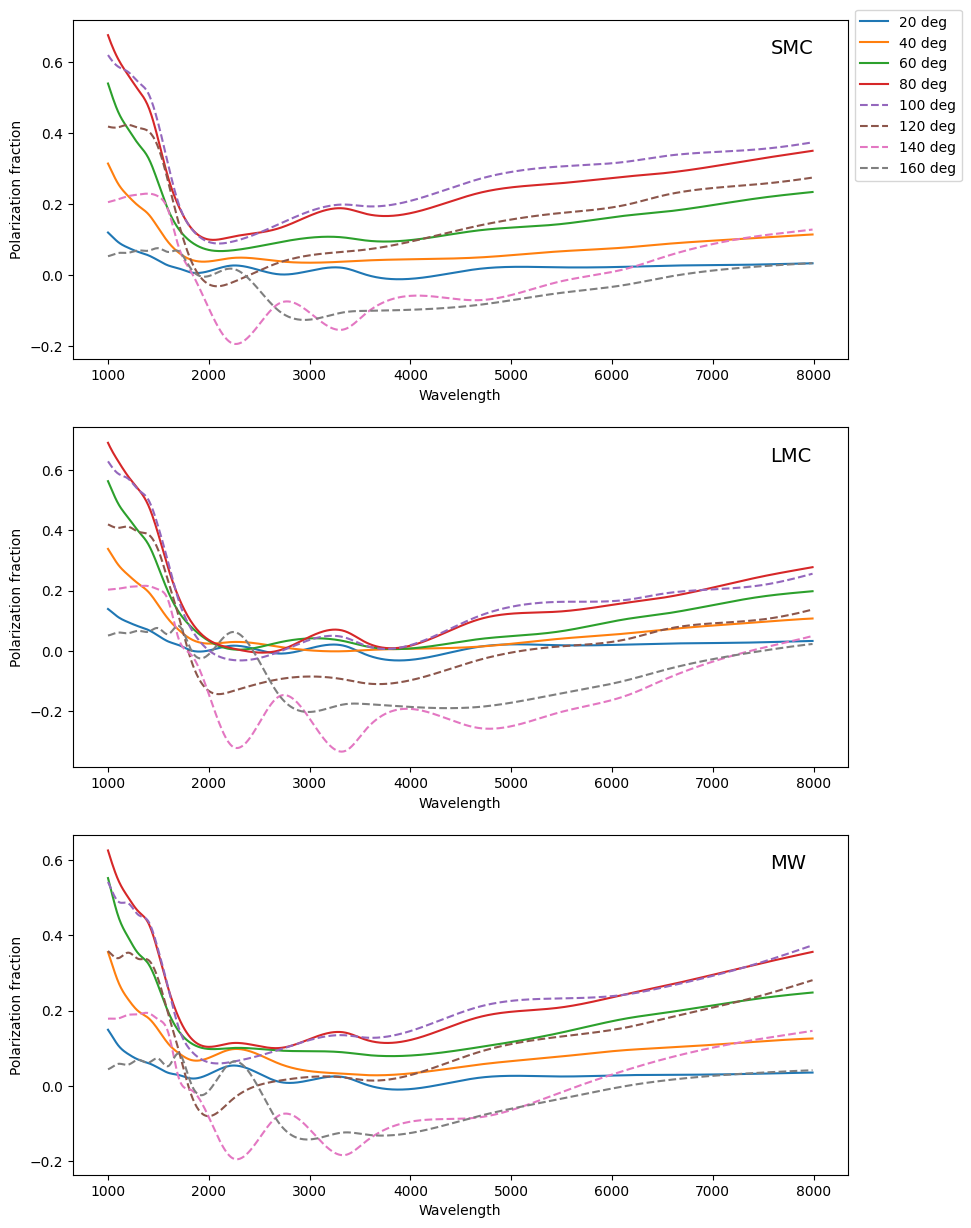

In [4]:
thetas = np.arange(20.,180.,20.)*u.deg
lambdas = np.arange(1000., 8000., 10.)*u.AA

fig, axs = plt.subplots(3,1, figsize=(10,15))
dust_types = ["SMC","LMC","MW"]

for i, ax in enumerate(axs):

    dust = draine_dust(type=dust_types[i])

    for k, theta in enumerate(thetas):
        if theta>90.*u.deg:
            linestyle = 'dashed'
        else:
            linestyle = 'solid'
        ax.plot(lambdas, dust.pfrac(lambdas.to(u.um).value, theta.to(u.deg).value).flatten(), label="{:.0f} deg".format(theta.to(u.deg).value), linestyle=linestyle)
    if i==0:
        ax.legend(bbox_to_anchor=(1.0, 1.05))
    ax.set_ylabel("Polarization fraction")
    ax.set_xlabel("Wavelength")
    #ax.set_ylim([-0.32, 0.47])
    ax.text(0.9, 0.9, dust_types[i], fontsize=14, transform=ax.transAxes)
plt.show()

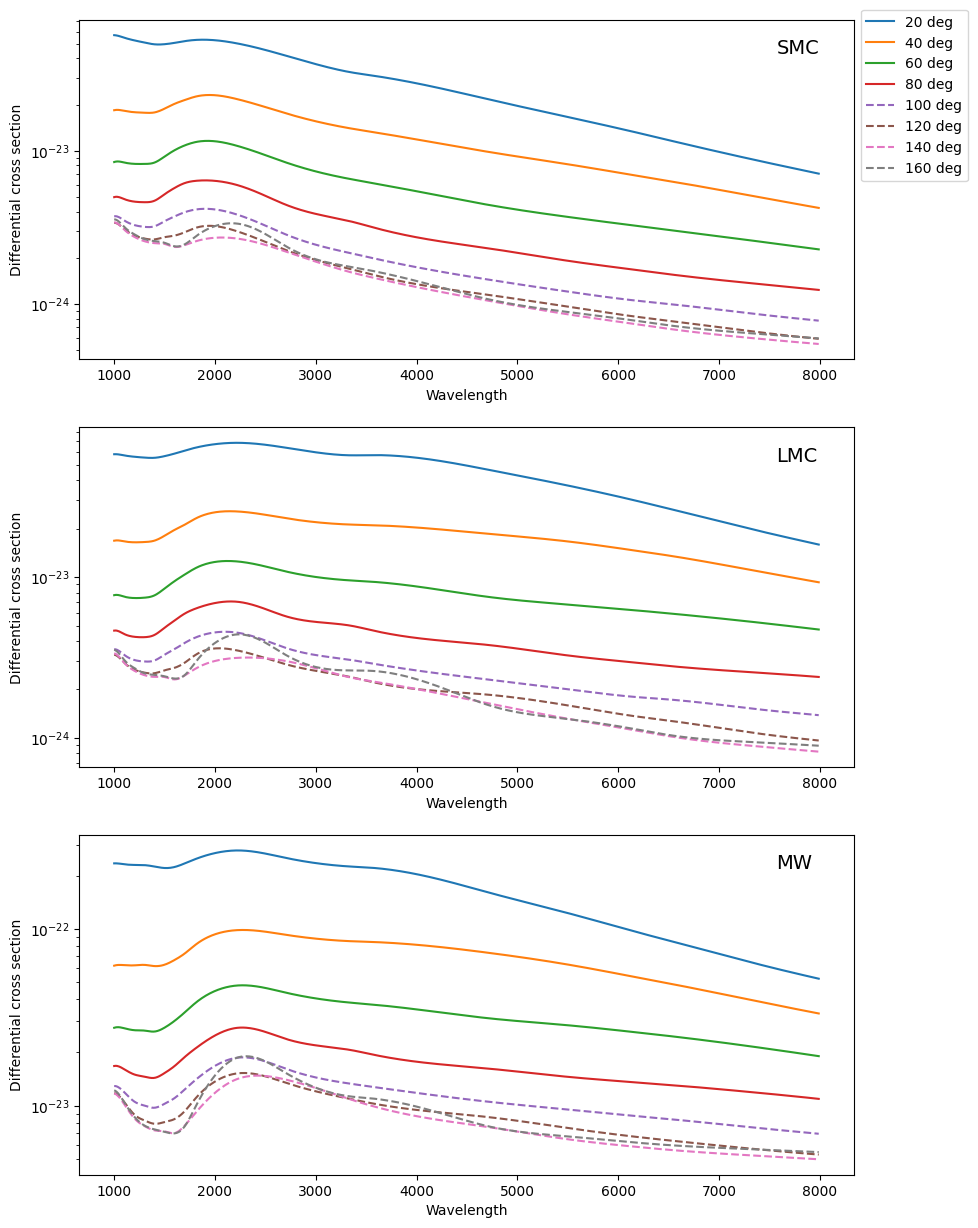

In [5]:
thetas = np.arange(20.,180.,20.)*u.deg
lambdas = np.arange(1000., 8000., 10.)*u.AA

fig, axs = plt.subplots(3,1, figsize=(10,15))
dust_types = ["SMC","LMC","MW"]

for i, ax in enumerate(axs):

    dust = draine_dust(type=dust_types[i])

    for k, theta in enumerate(thetas):
        if theta>90.*u.deg:
            linestyle = 'dashed'
        else:
            linestyle = 'solid'
        ax.plot(lambdas, dust.diff_cross_section(lambdas.to(u.um).value, theta.to(u.deg).value).flatten(), label="{:.0f} deg".format(theta.to(u.deg).value), linestyle=linestyle)
    if i==0:
        ax.legend(bbox_to_anchor=(1.0, 1.05))
    ax.set_ylabel("Differential cross section")
    ax.set_xlabel("Wavelength")
    ax.set_yscale('log')
    #ax.set_ylim([-0.32, 0.47])
    ax.text(0.9, 0.9, dust_types[i], fontsize=14, transform=ax.transAxes)
plt.show()

500 6000.0 Angstrom


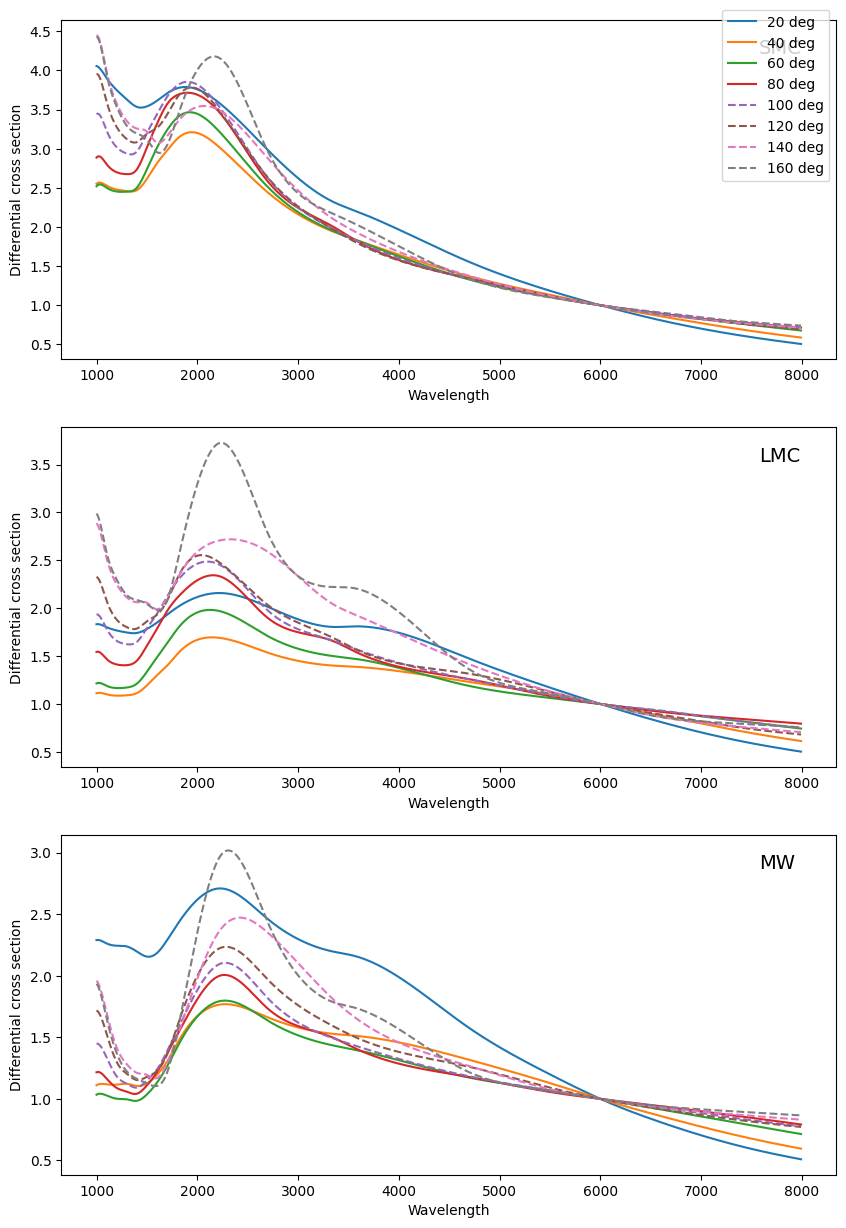

In [6]:
thetas = np.arange(20.,180.,20.)*u.deg
lambdas = np.arange(1000., 8000., 10.)*u.AA

fig, axs = plt.subplots(3,1, figsize=(10,15))
dust_types = ["SMC","LMC","MW"]

lam_norm = 6000.*u.AA
l_norm = np.argmin(np.abs(lambdas-lam_norm))
print(l_norm, lambdas[l_norm])

for i, ax in enumerate(axs):

    dust = draine_dust(type=dust_types[i])

    for k, theta in enumerate(thetas):
        if theta>90.*u.deg:
            linestyle = 'dashed'
        else:
            linestyle = 'solid'
        y = dust.diff_cross_section(lambdas.to(u.um).value, theta.to(u.deg).value).flatten() / dust.diff_cross_section(lambdas[l_norm].to(u.um).value, theta.to(u.deg).value).flatten()
        ax.plot(lambdas, y, label="{:.0f} deg".format(theta.to(u.deg).value), linestyle=linestyle)
    if i==0:
        ax.legend(bbox_to_anchor=(1.0, 1.05))
    ax.set_ylabel("Differential cross section")
    ax.set_xlabel("Wavelength")
    #ax.set_yscale('log')
    #ax.set_ylim([-0.32, 0.47])
    ax.text(0.9, 0.9, dust_types[i], fontsize=14, transform=ax.transAxes)
plt.show()